In [51]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import io
import seaborn as sns
np.set_printoptions(precision = 4 , suppress =True)

In [3]:
A = np.array([[2,-2,3],[1,1,1],[1,3,-1]])
A

array([[ 2, -2,  3],
       [ 1,  1,  1],
       [ 1,  3, -1]])

Calculate EigenPairs

In [4]:
values , vectors = np.linalg.eig(A)
print(values)

[ 3.  1. -2.]


In [5]:
print(vectors)

[[ 0.5774  0.5774 -0.6168]
 [ 0.5774 -0.5774 -0.0561]
 [ 0.5774 -0.5774  0.7851]]


Diagonal Matrix

In [6]:
A = np.array([[2,0,0],[0,1,0],[0,0,-1]])
A

array([[ 2,  0,  0],
       [ 0,  1,  0],
       [ 0,  0, -1]])

In [7]:
values , vectors = np.linalg.eig(A)
print(values)

[ 2.  1. -1.]


In [8]:
print(vectors)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# SVD and Low Rank Approximation

In [9]:
a = np.array([[1,2,3,4],[1,1,2,3],[0,1,1,0]])

In [10]:
u , s, vh = np.linalg.svd(a, full_matrices = True)

In [11]:
u.shape , s.shape , vh.shape

((3, 3), (3,), (4, 4))

u is orthonormal matrix

In [12]:
u.dot(u.T)

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0., -0.,  1.]])

In [13]:
s

array([6.7509, 1.1734, 0.2186])

In [14]:
sd = np.diag(s)
sd

array([[6.7509, 0.    , 0.    ],
       [0.    , 1.1734, 0.    ],
       [0.    , 0.    , 0.2186]])

In [15]:
b = np.zeros((3,4))
b

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [16]:
b[:,:-1] = sd

In [17]:
b

array([[6.7509, 0.    , 0.    , 0.    ],
       [0.    , 1.1734, 0.    , 0.    ],
       [0.    , 0.    , 0.2186, 0.    ]])

In [18]:
print(np.dot(np.dot(u,b),vh))

[[ 1.  2.  3.  4.]
 [ 1.  1.  2.  3.]
 [ 0.  1.  1. -0.]]


# Low Rank Approximation

In [19]:
s = [6.7509,1.1734,0]

In [20]:
sd = np.diag(s)

In [21]:
sd

array([[6.7509, 0.    , 0.    ],
       [0.    , 1.1734, 0.    ],
       [0.    , 0.    , 0.    ]])

In [22]:
b = np.zeros((3,4))
b

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [23]:
b[:,:-1] = sd

In [24]:
b

array([[6.7509, 0.    , 0.    , 0.    ],
       [0.    , 1.1734, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

In [25]:
print(np.dot(np.dot(u,b),vh))

[[ 1.0959  1.9567  3.0526  3.9542]
 [ 0.8764  1.0558  1.9322  3.0589]
 [-0.0559  1.0252  0.9693  0.0267]]


# Another Example where no. of rows greater than columns

In [26]:
a = np.array([[1,2,3,4],[1,1,2,3],[0,1,1,0],[0,2,2,0],[0,5,5,0]])
a

array([[1, 2, 3, 4],
       [1, 1, 2, 3],
       [0, 1, 1, 0],
       [0, 2, 2, 0],
       [0, 5, 5, 0]])

In [27]:
u , s , vh = np.linalg.svd(a)

In [28]:
u

array([[-0.5185, -0.5983,  0.6108, -0.    , -0.    ],
       [-0.3389, -0.512 , -0.7893,  0.    ,  0.    ],
       [-0.1433,  0.1125, -0.0114,  0.0312, -0.9827],
       [-0.2866,  0.225 , -0.0229, -0.9302,  0.0383],
       [-0.7166,  0.5626, -0.0572,  0.3658,  0.1812]])

In [29]:
s

array([9.2296, 4.4454, 0.2312, 0.    ])

In [30]:
vh

array([[-0.0929, -0.6149, -0.7079, -0.3349],
       [-0.2498,  0.375 ,  0.1252, -0.8839],
       [-0.7718,  0.3846, -0.3872,  0.3264],
       [ 0.5774,  0.5774, -0.5774,  0.    ]])

# SVD on Image

In [39]:
url = "/content/drive/MyDrive/Datasets/train/cat/1030251986_4312bc86a9.jpg"
myImg = io.imread(url)
gray_image = cv.cvtColor(myImg,cv.COLOR_BGR2GRAY)
img_mat = np.array(list(gray_image),float)

In [40]:
print(img_mat)

[[138. 137. 136. ...  92.  98.  96.]
 [136. 136. 135. ...  90. 101. 100.]
 [133. 134. 135. ...  85. 103. 106.]
 ...
 [ 70.  74.  80. ...  87.  69.  76.]
 [ 64.  69.  78. ...  76.  63.  69.]
 [ 61.  66.  76. ...  78.  66.  76.]]


In [41]:
img_mat.shape

(499, 499)

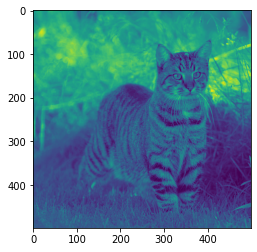

In [42]:
plt.imshow(img_mat)

In [43]:
# scale the image matrix before SVD
image_mat_scaled = (img_mat - img_mat.mean())/img_mat.std()

In [45]:
U,s,V = np.linalg.svd(image_mat_scaled)

In [46]:
var_explained = np.round(s**2/np.sum(s**2),decimals = 3)

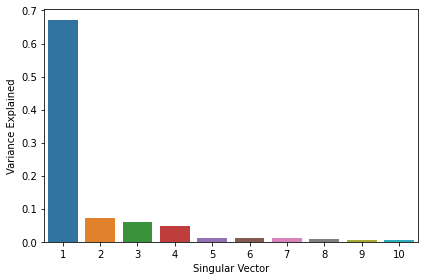

In [49]:
sns.barplot(x=list(range(1,11)),y=var_explained[0:10])
plt.xlabel('Singular Vector')
plt.ylabel('Variance Explained')
plt.tight_layout()

In [54]:
# Reconstruct with top 5 singular values
num_components = 5
reconst_img_5 = np.array(U[:,:num_components]).dot(np.diag(s[:num_components]).dot(np.array(V[:num_components,:])))

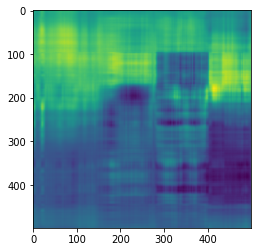

In [56]:
plt.imshow(reconst_img_5)

In [58]:
# Reconstruct with top 50 singular values
num_components = 50
reconst_img_50 = np.array(U[:,:num_components]).dot(np.diag(s[:num_components]).dot(np.array(V[:num_components,:])))

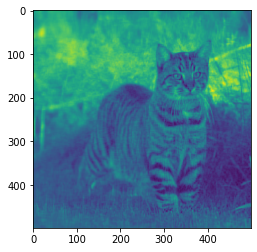

In [59]:
plt.imshow(reconst_img_50)